 # JEM

In [ ]:
!git clone https://github.com/ArseniyBolotin/JEM.git # forked from https://github.com/wgrathwohl/JEM

Cloning into 'JEM'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 99 (delta 0), reused 0 (delta 0), pack-reused 96
Unpacking objects: 100% (99/99), done.


In [ ]:
!wget www.cs.toronto.edu/~wgrathwohl/CIFAR10_MODEL.pt

--2021-11-17 12:42:09--  http://www.cs.toronto.edu/~wgrathwohl/CIFAR10_MODEL.pt
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268807111 (256M)
Saving to: ‘CIFAR10_MODEL.pt’

CIFAR10_MODEL.pt    100%[===================>] 256.35M  14.5MB/s    in 28s     

2021-11-17 12:42:38 (9.26 MB/s) - ‘CIFAR10_MODEL.pt’ saved [268807111/268807111]



In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Accuracy and Calibration

| Wide-Resnet 28x10
loading model from CIFAR10_MODEL.pt


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data/cifar-10-python.tar.gz to ../data


100%|██████████| 100/100 [00:19<00:00,  5.18it/s]


loss : 0.281610906124115, accuracy : 0.9283000230789185


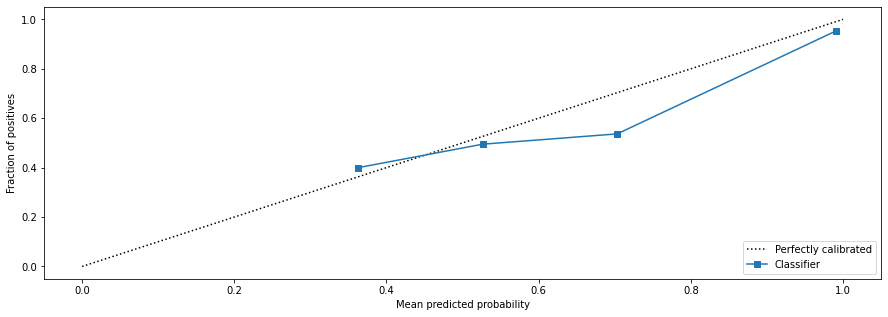

In [ ]:
%matplotlib inline
%run JEM/eval_wrn_ebm.py --load_path CIFAR10_MODEL.pt --eval test_clf --dataset cifar_test

## OOD

### $$s_{\theta}(x) = log p(x)$$

| Wide-Resnet 28x10
loading model from CIFAR10_MODEL.pt
OOD Evaluation
Files already downloaded and verified


  0%|          | 0/64275384 [00:00<?, ?it/s]

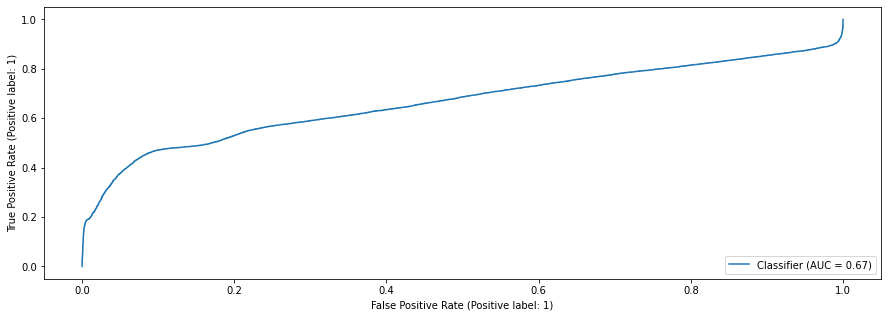

0.6654557871081745


In [ ]:
%matplotlib inline
%run JEM/eval_wrn_ebm.py --load_path CIFAR10_MODEL.pt --eval OOD --ood_dataset svhn

| Wide-Resnet 28x10
loading model from CIFAR10_MODEL.pt
Files already downloaded and verified


  0%|          | 0/64275384 [00:00<?, ?it/s]

Files already downloaded and verified


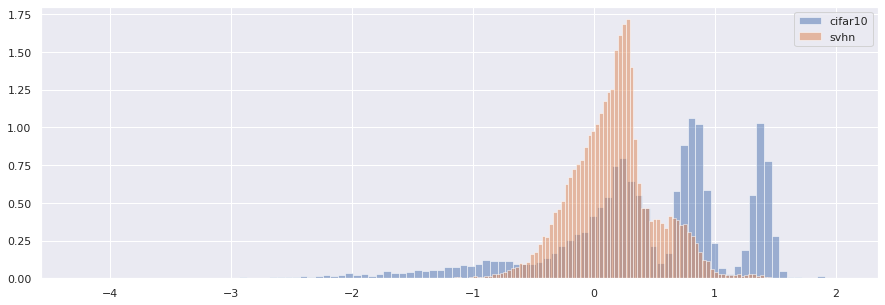

In [ ]:
%matplotlib inline
%run JEM/eval_wrn_ebm.py --load_path CIFAR10_MODEL.pt --eval logp_hist --datasets cifar10 svhn --save_dir /content/YOUR_SAVE_PATH_BUDDDDDDYYYYYYY

### $$s_{\theta}(x) = max_{y} p(y|x)$$

| Wide-Resnet 28x10
loading model from CIFAR10_MODEL.pt
OOD Evaluation
Files already downloaded and verified
Using downloaded and verified file: ../data/test_32x32.mat


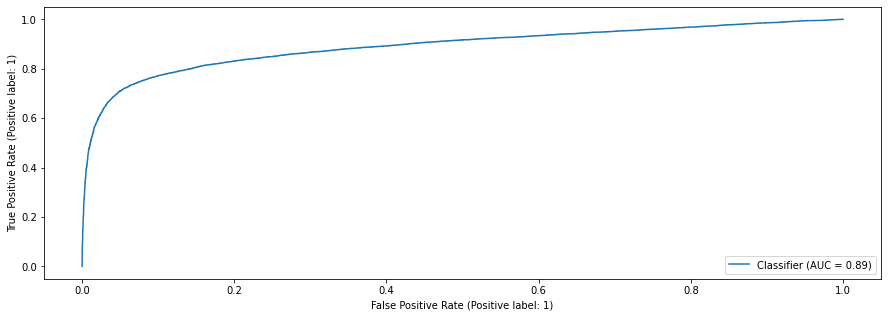

0.8899349185617702


In [ ]:
%matplotlib inline
%run JEM/eval_wrn_ebm.py --load_path CIFAR10_MODEL.pt --eval OOD --ood_dataset svhn --score_fn py

| Wide-Resnet 28x10
loading model from CIFAR10_MODEL.pt
Files already downloaded and verified
Using downloaded and verified file: ../data/test_32x32.mat
Files already downloaded and verified


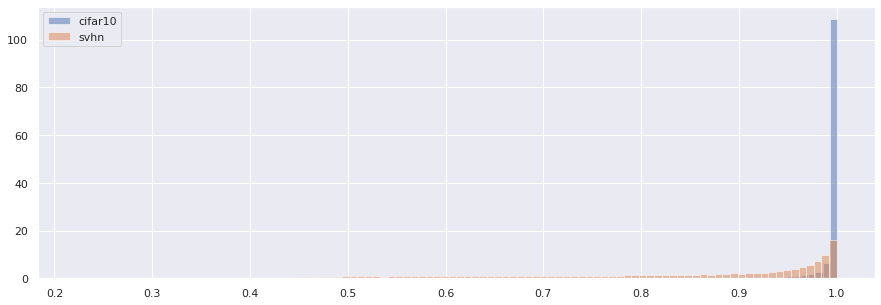

In [ ]:
%matplotlib inline
%run JEM/eval_wrn_ebm.py --load_path CIFAR10_MODEL.pt --eval logp_hist --datasets cifar10 svhn --save_dir /content/YOUR_SAVE_PATH_BUDDDDDDYYYYYYY --score_fn py

### $$s_{\theta}(x) = \left\lVert \frac{\partial{log p(x)}}{\partial{x}} \right\rVert
$$

| Wide-Resnet 28x10
loading model from CIFAR10_MODEL.pt
OOD Evaluation
Files already downloaded and verified
Using downloaded and verified file: ../data/test_32x32.mat


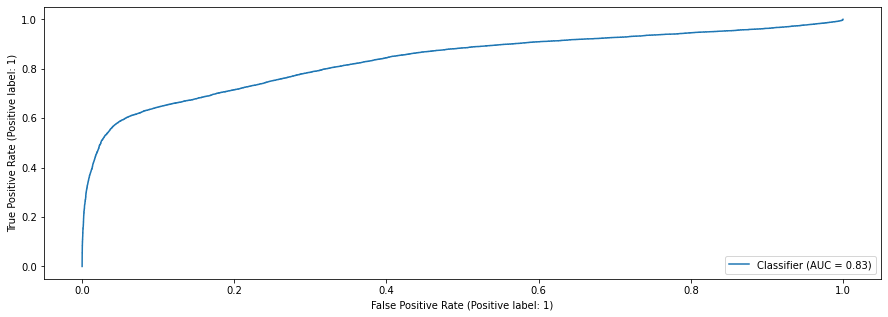

0.8338886120928088


In [ ]:
%matplotlib inline
%run JEM/eval_wrn_ebm.py --load_path CIFAR10_MODEL.pt --eval OOD --ood_dataset svhn --score_fn pxgrad

| Wide-Resnet 28x10
loading model from CIFAR10_MODEL.pt
Files already downloaded and verified
Using downloaded and verified file: ../data/test_32x32.mat
Files already downloaded and verified


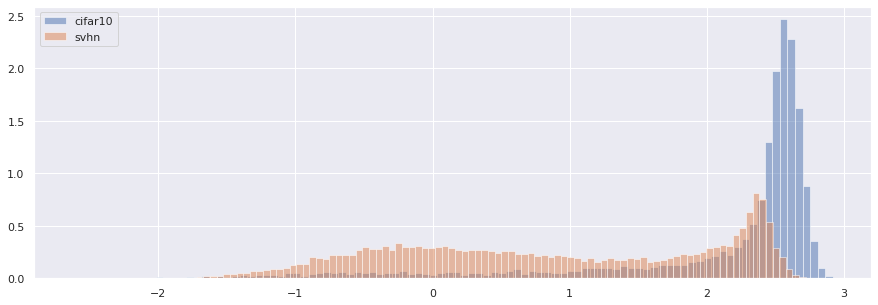

In [ ]:
%matplotlib inline
%run JEM/eval_wrn_ebm.py --load_path CIFAR10_MODEL.pt --eval logp_hist --datasets cifar10 svhn --save_dir /content/YOUR_SAVE_PATH_BUDDDDDDYYYYYYY --score_fn pxgrad

## Unconditional samples

In [ ]:
!python JEM/eval_wrn_ebm.py --load_path CIFAR10_MODEL.pt --eval uncond_samples --save_dir ./YOUR_SAVE_PATH_BUDDDDDDYYYYYYY/uncond_samples --n_sample_steps 1000 --buffer_size 10000 --n_steps 40 --print_every 100 --reinit_freq 0.05

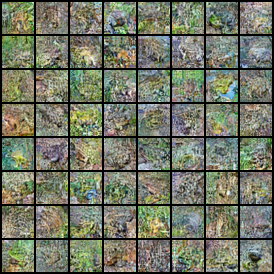

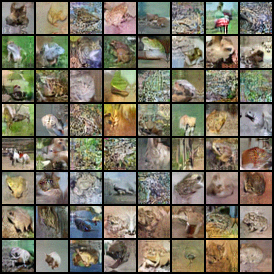

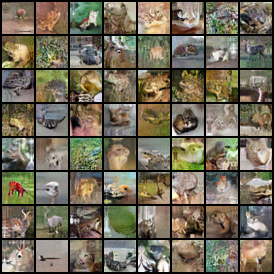

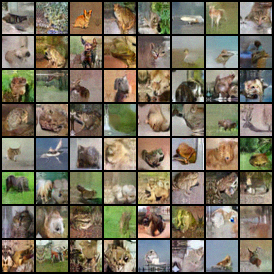

In [ ]:
from IPython.display import Image, display
for count in range(0, 1000, 300):
    display(Image('/content/YOUR_SAVE_PATH_BUDDDDDDYYYYYYY/uncond_samples/samples_' + str(count) + '.png', width=400, height=400))
    print()


## Conditional samples

In [ ]:
!python JEM/eval_wrn_ebm.py --load_path CIFAR10_MODEL.pt --eval cond_samples --save_dir ./YOUR_SAVE_PATH_BUDDDDDDYYYYYYY/cond_samples --n_sample_steps 1000 --buffer_size 10000 --n_steps 40 --print_every 100 --reinit_freq 0.05 --fresh_samples

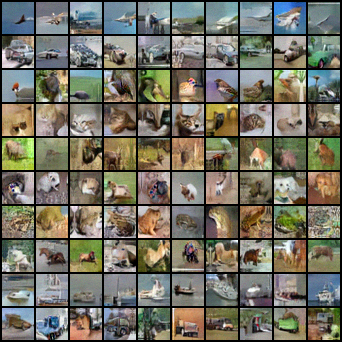

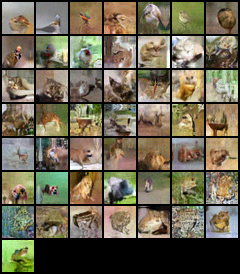

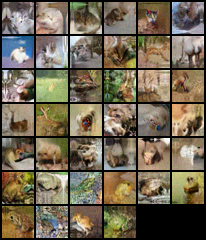

In [ ]:
from IPython.display import Image, display
for count in range(1, 100, 40):
    display(Image('/content/YOUR_SAVE_PATH_BUDDDDDDYYYYYYY/cond_samples/samples_' + str(count) + '.png', width=400, height=400))
    print()
